# 주제 : 새로 출시된 게임, 전문가 리뷰 믿고 바로 구매해도 될까요? 직접 데이터로 분석하고 판단해 보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Video Game Sales with Ratings을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    Video_Games_Sales_as_at_22_Dec_2016.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## 최종 목표
    - 흥미로운 일상적인 데이터 분석해 보기
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - 학습된 모델로 부터의 인사이트 획득 방법 습득

- 출제자 : 신제용 강사
---

## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!rm *.*
!kaggle datasets download -d rush4ratio/video-game-sales-with-ratings
!unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
  0% 0.00/476k [00:00<?, ?B/s]
100% 476k/476k [00:00<00:00, 70.6MB/s]
Archive:  video-game-sales-with-ratings.zip
  inflating: Video_Games_Sales_as_at_22_Dec_2016.csv  


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [6]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 결손 데이터 데이터프레임에서 제거하기


In [7]:
# dropna() 메소드를 이용하여 결손 데이터가 포함된 row를 제거
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,E.T. The Extra-Terrestrial,GBA,2001.0,Action,NewKidCo,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,Fluid Studios,E
16677,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,Criterion Games,M
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16700,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,Atomic Games,T


### 문제 5. 수치형 데이터의 히스토그램 확인하기


In [11]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

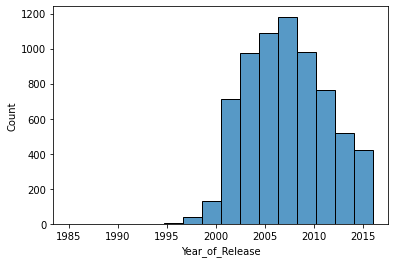

In [14]:
# Seaborn의 histplot()을 이용하여 히스토그램 확인
# 값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인
sns.histplot(x='Year_of_Release', data=df, bins=16)

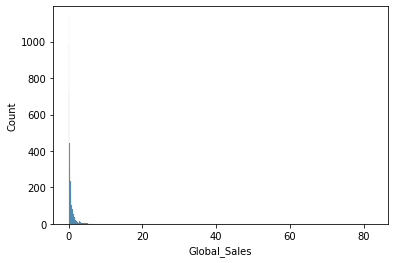

In [15]:
sns.histplot(x='Global_Sales', data=df)

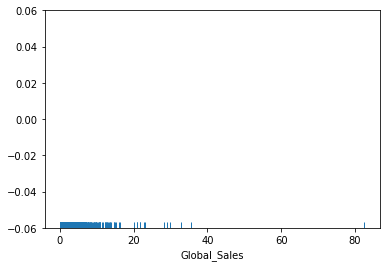

In [16]:
sns.rugplot(x='Global_Sales', data=df)

In [18]:
df[df['Global_Sales'] > 30]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [22]:
gs = df['Global_Sales'].quantile(0.99)

In [23]:
df = df[df['Global_Sales'] < gs]

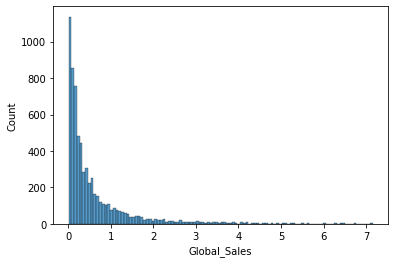

In [24]:
sns.histplot(x='Global_Sales', data=df)

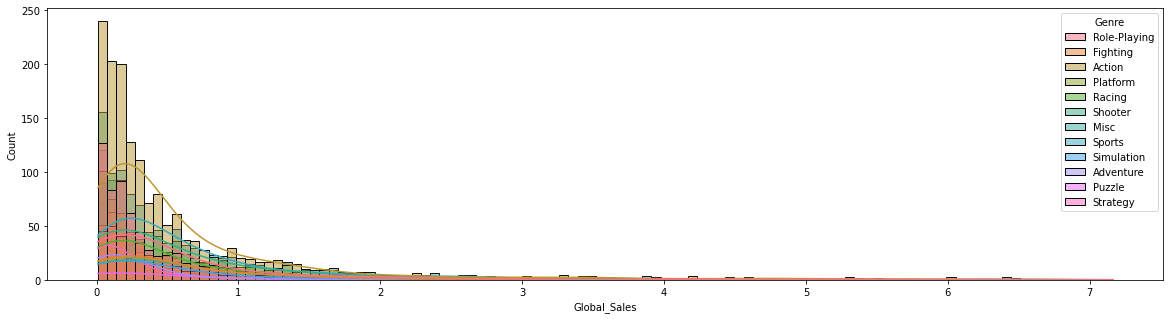

In [27]:
fig = plt.figure(figsize=(20, 5))
sns.histplot(x='Global_Sales', hue='Genre', kde=True, data=df)

In [28]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

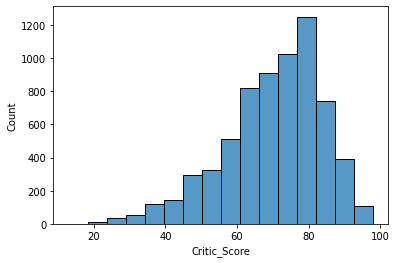

In [32]:
sns.histplot(x='Critic_Score', data=df, bins=16)

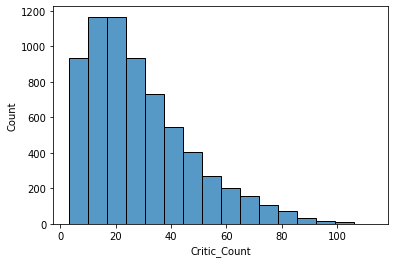

In [36]:
sns.histplot(x='Critic_Count', data=df, bins=16)

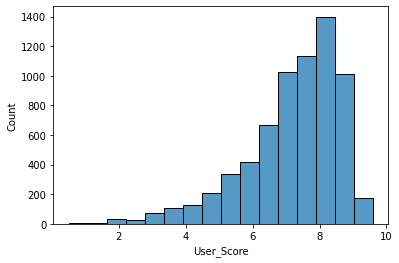

In [34]:
sns.histplot(data=df['User_Score'].apply(float), bins=16)

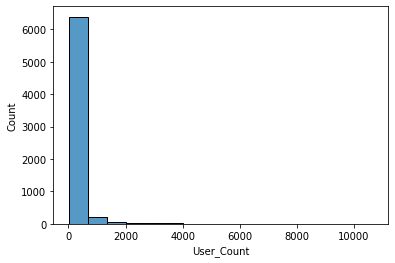

In [37]:
sns.histplot(x='User_Count', data=df, bins=16)

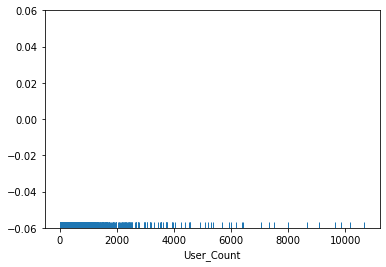

In [38]:
sns.rugplot(x='User_Count', data=df)

In [40]:
uc = df['User_Count'].quantile(0.99)

In [41]:
df = df[df['User_Count'] < uc]

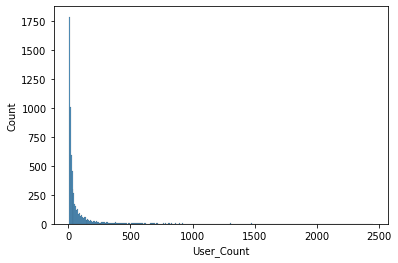

In [42]:
sns.histplot(x='User_Count', data=df)

In [47]:
uc = df['User_Count'].quantile(0.97)
print(uc)

911.5599999999977


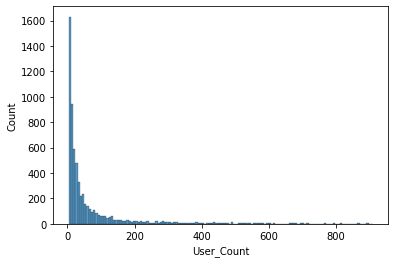

In [48]:
df = df[df['User_Count'] < uc]
sns.histplot(x='User_Count', data=df)

### 문제 6. 수치형 데이터와 전국 판매량의 Jointplot 분석하기

In [55]:
df['User_Score'] = df['User_Score'].apply(float)

In [49]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

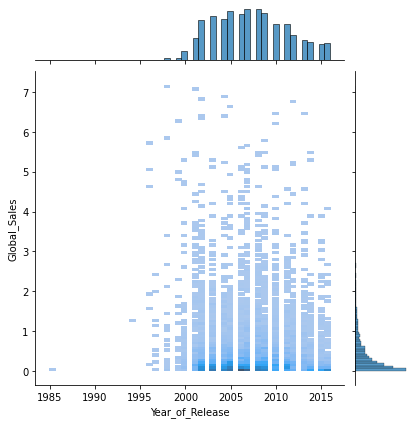

In [52]:
# 수치형 데이터와 전국 판매량의 관계를 Seaborn의 jointplot()으로 시각화/분석
sns.jointplot(x='Year_of_Release', y='Global_Sales', data=df, kind='hist')

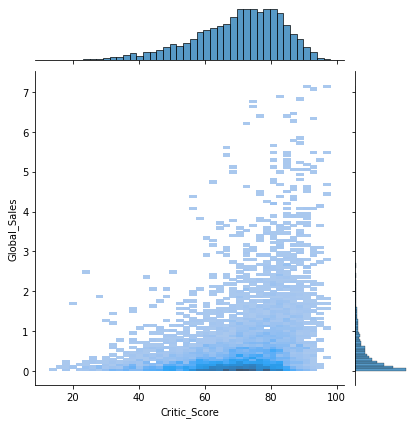

In [53]:
sns.jointplot(x='Critic_Score', y='Global_Sales', data=df, kind='hist')

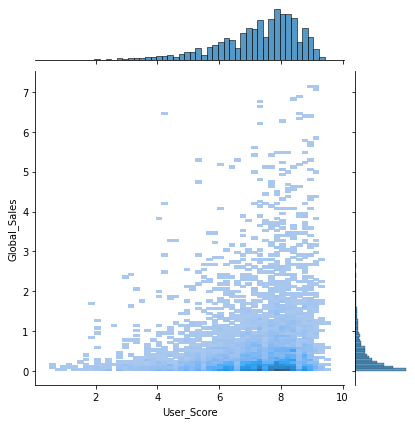

In [56]:
sns.jointplot(x='User_Score', y='Global_Sales', data=df, kind='hist')

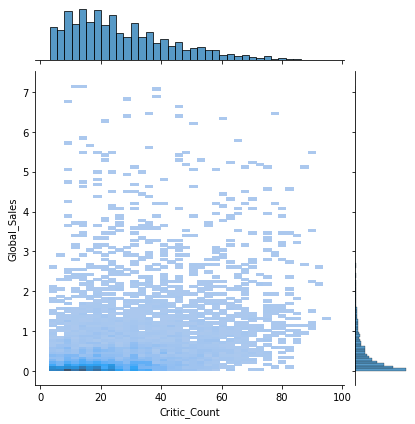

In [57]:
sns.jointplot(x='Critic_Count', y='Global_Sales', data=df, kind='hist')

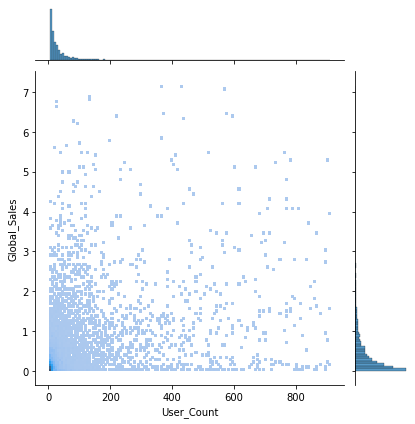

In [58]:
sns.jointplot(x='User_Count', y='Global_Sales', data=df, kind='hist')

### 문제 7. 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

In [59]:
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

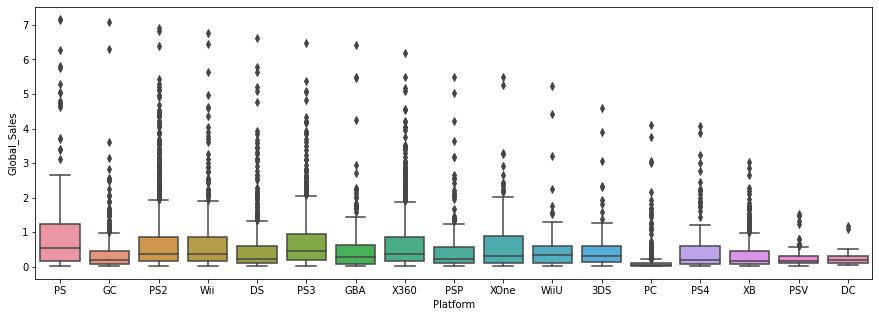

In [61]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Platform', y='Global_Sales', data=df)

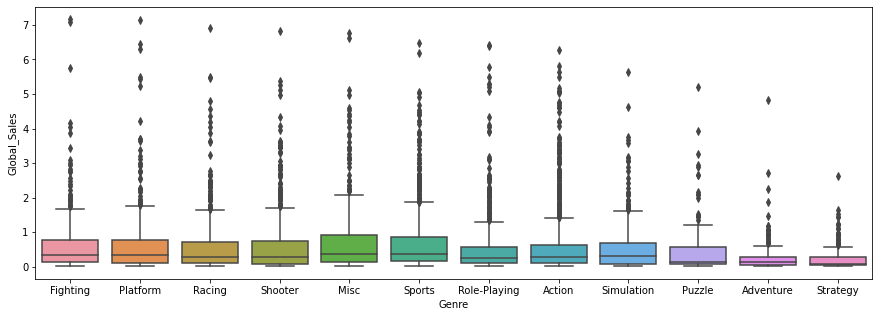

In [62]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Genre', y='Global_Sales', data=df)

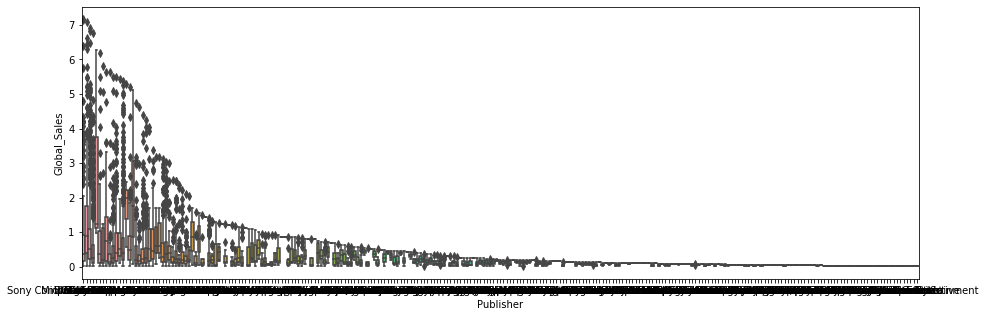

In [63]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Publisher', y='Global_Sales', data=df)

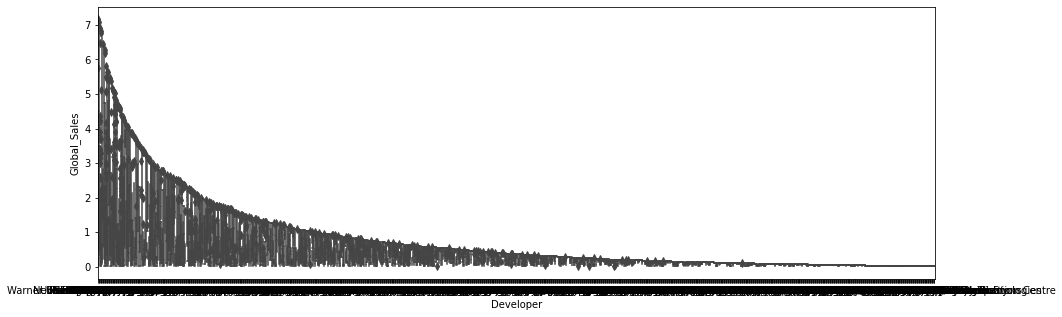

In [64]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Developer', y='Global_Sales', data=df)

### 문제 8. 전문가 평점과 사용자 평점의 차이 분석하기

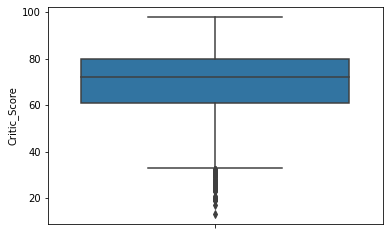

In [65]:
# Seaborn 시각화로 전문가 평점과 사용자 평점의 통계 비교/분석하기
# Hint) 두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교
# Tip) 별도의 DataFrame을 구성하여 boxplot으로 비교하면 편리함
sns.boxplot(y='Critic_Score', data=df)

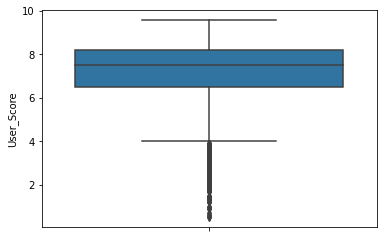

In [66]:
sns.boxplot(y='User_Score', data=df)

In [70]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score': 'Score'}, axis=1, inplace=True)
critic_score['ScoreBy'] = 'Critics'

In [75]:
user_score = df[['User_Score']].copy() * 10
user_score.rename({'User_Score': 'Score'}, axis=1, inplace=True)
user_score['ScoreBy'] = 'Users'

In [76]:
scores = pd.concat([critic_score, user_score])
scores

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


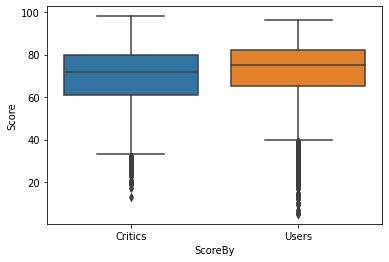

In [77]:
sns.boxplot(x='ScoreBy', y='Score', data=scores)

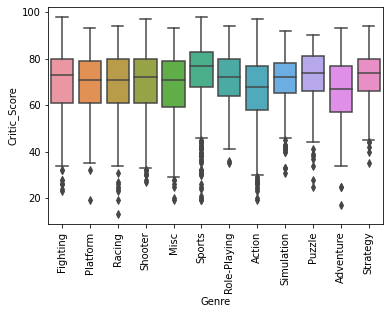

In [80]:
sns.boxplot(x='Genre', y='Critic_Score', data=df)
plt.xticks(rotation=90)
plt.show()

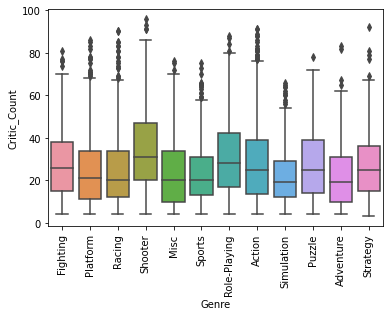

In [82]:
sns.boxplot(x='Genre', y='Critic_Count', data=df)
plt.xticks(rotation=90)
plt.show()

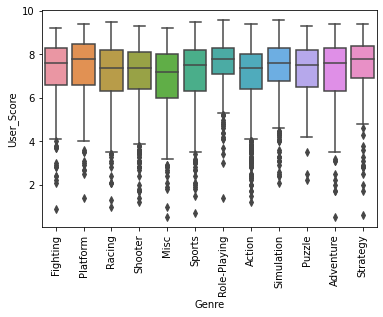

In [81]:
sns.boxplot(x='Genre', y='User_Score', data=df)
plt.xticks(rotation=90)
plt.show()

### 문제 9. 수치형 데이터간의 상관성 시각화하기

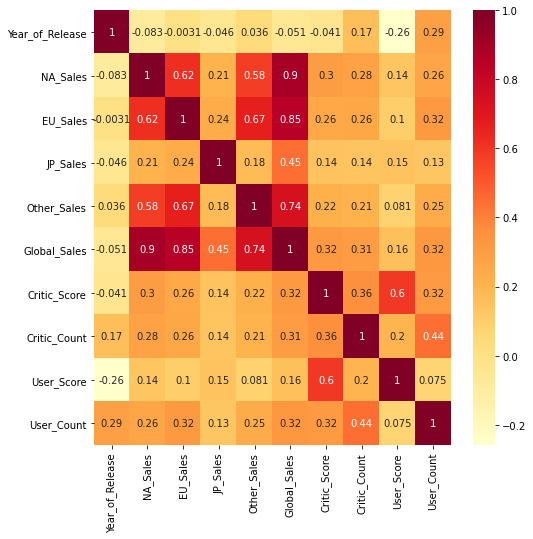

In [87]:
# Correlation Heatmap 시각화하기
fig = plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 10. 범주형 데이터에서 소수 범주를 others로 대체하기

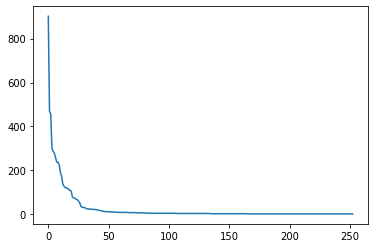

In [89]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
# Hint) value_counts()를 이용하여 범주별 개수를 확인
pb = df['Publisher'].value_counts()
plt.plot(range(len(pb)), pb)

In [91]:
df['Publisher'] = df['Publisher'].apply(lambda s: s if s not in pb[20:] else 'others')

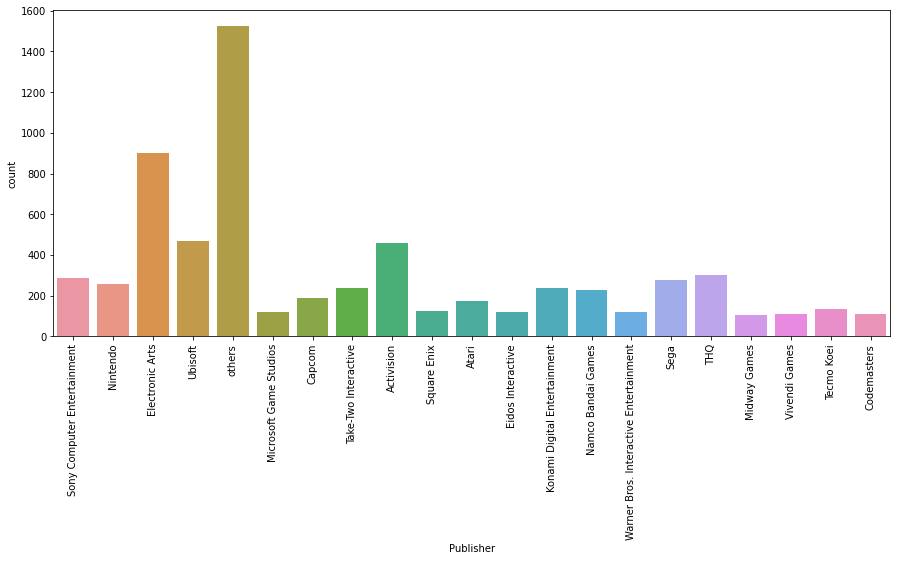

In [94]:
fig = plt.figure(figsize=(15, 6))
sns.countplot(x='Publisher', data=df)
plt.xticks(rotation=90)
plt.show()

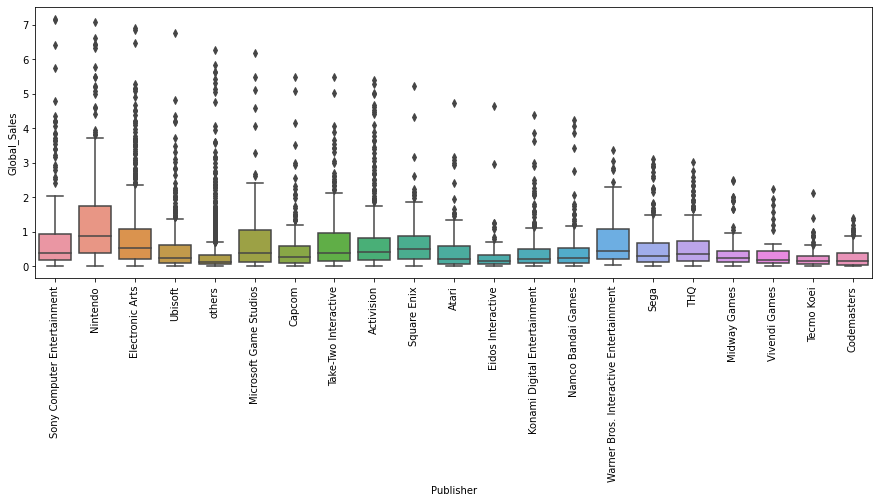

In [96]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Publisher', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

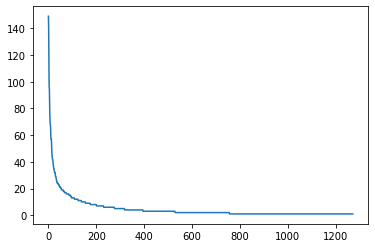

In [97]:
dev = df['Developer'].value_counts()
plt.plot(range(len(dev)), dev)

In [98]:
df['Developer'] = df['Developer'].apply(lambda s: s if s not in dev[20:] else 'others')

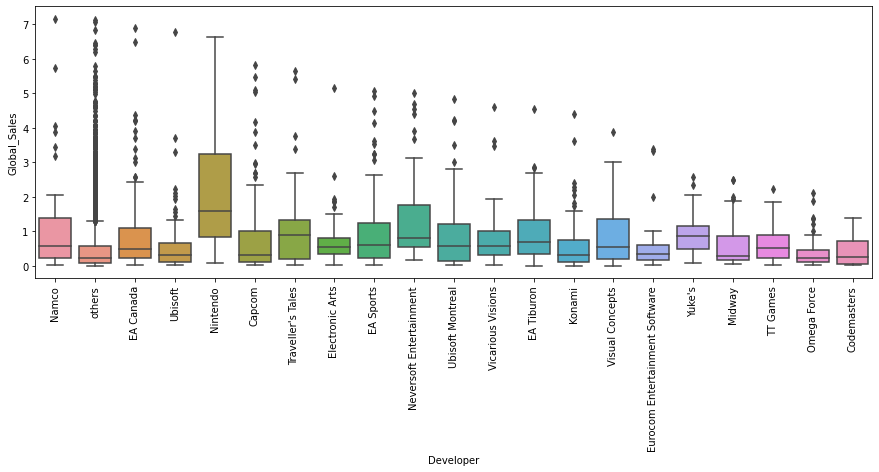

In [99]:
fig = plt.figure(figsize=(15, 5))
sns.boxplot(x='Developer', y='Global_Sales', data=df)
plt.xticks(rotation=90)
plt.show()

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리


In [100]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [102]:
X_cat = df[['Platform', 'Genre', 'Publisher']]
X_cat = pd.get_dummies(X_cat, drop_first=True)

## Step 4. 전국 판매량 Regression 모델 학습하기

### 문제 12. 전국 판매량 추정을 위한 입출력 데이터 구성하기


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [104]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [105]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Global_Sales']

In [106]:
X.head()

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Atari,Publisher_Capcom,Publisher_Codemasters,Publisher_Eidos Interactive,Publisher_Electronic Arts,Publisher_Konami Digital Entertainment,Publisher_Microsoft Game Studios,Publisher_Midway Games,Publisher_Namco Bandai Games,Publisher_Nintendo,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
106,-2.237912,1.944152,-0.704478,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
109,-2.237912,1.577371,-0.874440,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
111,-1.514757,1.650727,0.598567,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
113,-0.791602,0.917163,0.655221,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,-1.273706,1.357302,0.088680,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 문제 13. XGBoost 모델 생성/학습하기

In [108]:
from xgboost import XGBRegressor

In [109]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[13:43:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 14. Linear Regression 모델 생성/학습하기

In [110]:
from sklearn.linear_model import LinearRegression

In [112]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 15. 모델 학습 결과 평가하기

In [113]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [115]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))

XGB MAE: 0.39659319130408194
XGB RMSE: 0.6821165671897874
LR MAE: 0.4435623723861831
LR RMSE: 0.7033240396642875


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


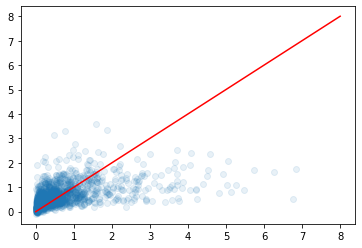

In [117]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([0, 8], [0,8], 'r-')

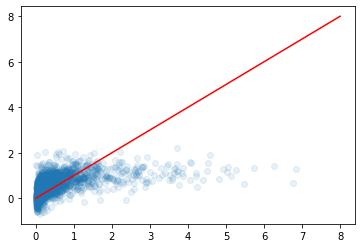

In [118]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0, 8], [0,8], 'r-')

### 문제 17. XGBoost 모델의 Feature Importance 시각화하기

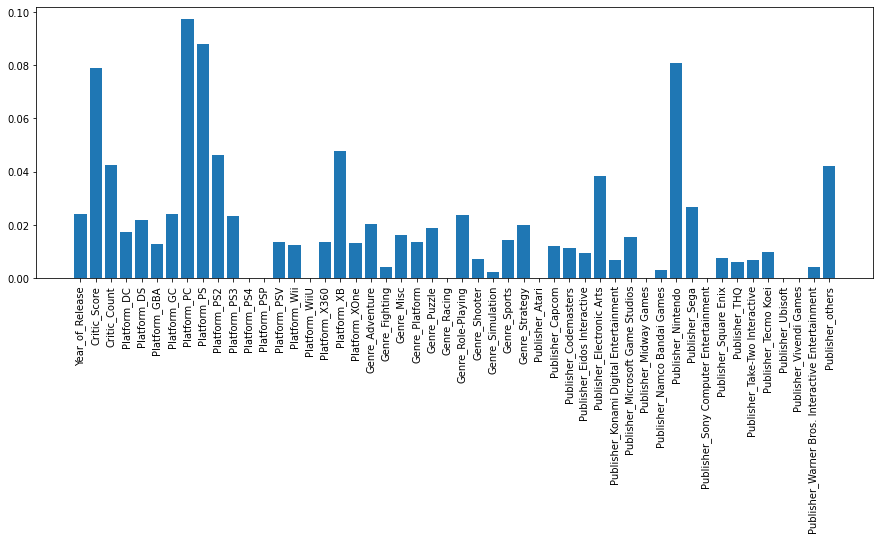

In [120]:
fig = plt.figure(figsize=(15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

## Step 5. 유저 평점 Regression 모델 학습하기

### 문제 18. 유저 평점 추정을 위한 입출력 데이터 구성하기


In [121]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [124]:
# 유저 평점 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['User_Score']

In [125]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 문제 19. XGBoost 모델 생성/학습하기

In [126]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[13:55:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 20. Linear Regression 모델 생성/학습하기

In [127]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 문제 21. 모델 학습 결과 평가하기

In [128]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

print('XGB MAE:', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE:', sqrt(mean_squared_error(y_test, pred_xgb)))

print('LR MAE:', mean_absolute_error(y_test, pred_lr))
print('LR RMSE:', sqrt(mean_squared_error(y_test, pred_lr)))

XGB MAE: 0.74224728947734
XGB RMSE: 1.0158512368202421
LR MAE: 0.779957137091311
LR RMSE: 1.0532062590705695


### 문제 22. 실제 값과 추측 값의 Scatter plot 시각화하기


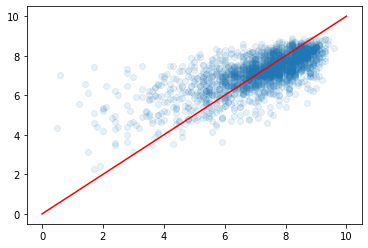

In [129]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha=0.1)
plt.plot([0, 10], [0,10], 'r-')

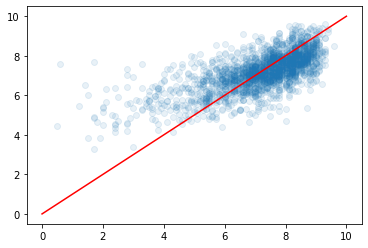

In [130]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0, 10], [0,10], 'r-')

### 문제 23. XGBoost 모델의 Feature Importance 시각화하기

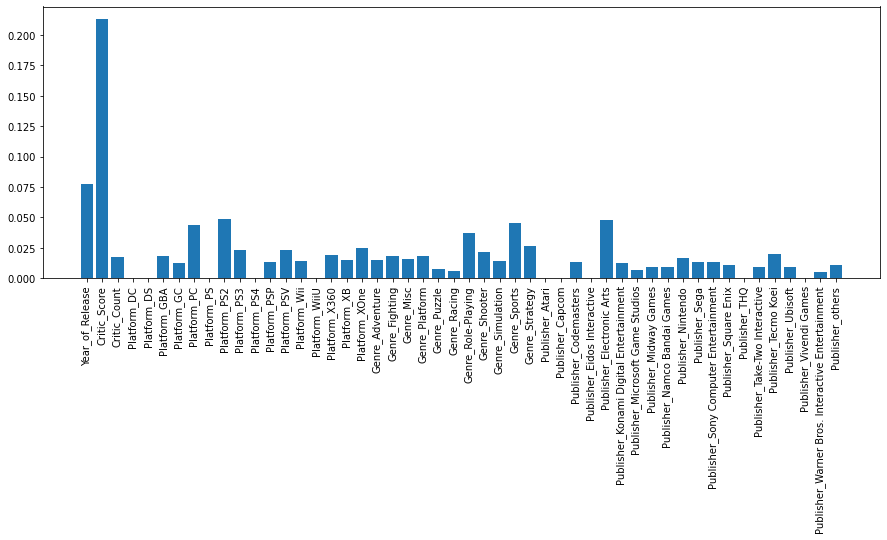

In [131]:
fig = plt.figure(figsize=(15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()